# 负离子数据处理
## 1 5 12h

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from brokenaxes import brokenaxes

In [3]:
df=pd.read_excel(r'E:\科研\2L-10cm-臭氧气体停留时间.xls',sheetname='Sheet2')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [33]:
d=df.groupby('a')['c'].sum()

In [34]:
d = pd.DataFrame({'zong':d}).reset_index()

In [35]:
data=pd.merge(df,d,on='a')

In [36]:
data

,a,b,c,d,zong
0,1,4,1.2,NaN,3.0
1,1,40,0.9,0.300000,3.0
2,1,60,0.9,0.195652,3.0
3,2,88,1.2,0.400000,4.6
4,2,93,1.4,0.002810,4.6
5,2,100,2.0,0.030257,4.6
6,3,103,3.0,NaN,3.0
7,4,109,3.7,NaN,498.2
8,4,115,23.2,NaN,498.2
9,4,122,32.8,NaN,498.2


In [2]:
#读入数据
df=pd.read_excel(r'H:\脱附实验\挥发性实验质谱数据表\neg_tuofu_second.xlsx',sheetname='Sheet1')
df_list=pd.read_excel(r'H:\脱附实验\挥发性实验质谱数据表\neg_tuofu_second.xlsx',sheetname='Sheet2')
#湿度，脱附时间分组
# 1,5,12 小时脱附，
df2=pd.DataFrame({'RH_Time':[5,1,12,401,405,4012,801,805,8012,0],'RH':[0,0,0,40,40,40,80,80,80,0],'Time':[5,1,12,1,5,12,1,5,12,0]})
# df_RT=pd.DataFrame({'RH_Time_new':[3,5,1,12,403,401,405,4012,803,801,805,8012,0],'RH':[0,0,0,0,40,40,40,40,80,80,80,80,0],'Time':[3,5,1,12,3,1,5,12,3,1,5,12,0]})
neg_data=pd.merge(df,df_list,on='RH_Time')
neg_data=pd.merge(neg_data,df_RT,on='RH_Time_new')
neg_data.head()

,id,Name,Trace,RT,Area,Response,RH_Time,RH_Time_new,RH,Time
0,1,C10H15O3,183.1021,7.68,130.925,130.925,1,8012,80,12
1,2,C10H15O3 (2),183.1021,8.13,20600.320,20600.320,1,8012,80,12
2,3,C10H15O3 (3),183.1021,10.43,5999.572,5999.572,1,8012,80,12
3,4,C10H15O3 (4),183.1021,11.27,6586.199,6586.199,1,8012,80,12
4,5,C10H15O5,215.0918,7.39,3598.701,3598.701,1,8012,80,12


In [3]:
#取归一化所用的物质 C17H25O8 
norm_compont=neg_data[neg_data['Name']=='C17H25O8'][['RH_Time','Area']]
#取出数据与原表合并
neg_data=pd.merge(neg_data,norm_compont,on='RH_Time')
neg_data.head()

,id,Name,Trace,RT,Area_x,Response,RH_Time,RH_Time_new,RH,Time,Area_y
0,1,C10H15O3,183.1021,7.68,130.925,130.925,1,8012,80,12,1622134.75
1,2,C10H15O3 (2),183.1021,8.13,20600.320,20600.320,1,8012,80,12,1622134.75
2,3,C10H15O3 (3),183.1021,10.43,5999.572,5999.572,1,8012,80,12,1622134.75
3,4,C10H15O3 (4),183.1021,11.27,6586.199,6586.199,1,8012,80,12,1622134.75
4,5,C10H15O5,215.0918,7.39,3598.701,3598.701,1,8012,80,12,1622134.75


In [5]:
 #生成归一化数据
neg_data['归一化信号']=neg_data['Area_x']/neg_data['Area_y']
#取干态条件为对比数据
duizao=neg_data[neg_data['Time']==0]['归一化信号']
duizao_data=list(duizao)*13
neg_data['对照实验']=duizao_data
neg_data['变化比例']=(neg_data['归一化信号']-neg_data['对照实验'])/neg_data['对照实验']
neg_data['type']=neg_data.Trace.apply(lambda x: 'Dimer' if x>=269 else 'Monomer')
neg_data.head()

,id,Name,Trace,RT,Area_x,Response,RH_Time,RH_Time_new,RH,Time,Area_y,归一化信号,对照实验,变化比例,type
0,1,C10H15O3,183.1021,7.68,130.925,130.925,1,8012,80,12,1622134.75,0.000081,0.001835,-0.956019,Monomer
1,2,C10H15O3 (2),183.1021,8.13,20600.320,20600.320,1,8012,80,12,1622134.75,0.012700,0.122741,-0.896534,Monomer
2,3,C10H15O3 (3),183.1021,10.43,5999.572,5999.572,1,8012,80,12,1622134.75,0.003699,0.005194,-0.287983,Monomer
3,4,C10H15O3 (4),183.1021,11.27,6586.199,6586.199,1,8012,80,12,1622134.75,0.004060,0.002894,0.403199,Monomer
4,5,C10H15O5,215.0918,7.39,3598.701,3598.701,1,8012,80,12,1622134.75,0.002218,0.001634,0.357869,Monomer


In [6]:
duizao2=neg_data[neg_data['Time']==0]['对照实验']
duizao_data=list(duizao2)*13
neg_data['干态信号']=duizao_data
neg_data['相对比例']=neg_data['归一化信号']/neg_data['干态信号']
neg_data.tail()

,id,Name,Trace,RT,Area_x,Response,RH_Time,RH_Time_new,RH,Time,Area_y,归一化信号,对照实验,变化比例,type,干态信号,相对比例
2114,159,C9H15O2 (2),155.1071,7.50,1046.254,1046.254,13,0,0,0,1278165.625,0.000819,0.000819,0.0,Monomer,0.000819,1.0
2115,160,C9H15O3,171.1024,6.79,1524.996,1524.996,13,0,0,0,1278165.625,0.001193,0.001193,0.0,Monomer,0.001193,1.0
2116,161,C9H15O3 (2),171.1024,8.90,3146.543,3146.543,13,0,0,0,1278165.625,0.002462,0.002462,0.0,Monomer,0.002462,1.0
2117,162,C5H7O3,115.0389,5.21,669.628,669.628,13,0,0,0,1278165.625,0.000524,0.000524,0.0,Monomer,0.000524,1.0
2118,163,C5H7O3 (2),115.0389,9.65,1941.006,1941.006,13,0,0,0,1278165.625,0.001519,0.001519,0.0,Monomer,0.001519,1.0


In [28]:
data=neg_data[neg_data['Area_x']>=2000]
xianzhu=data[abs(data['变化比例'])>=0.3]

In [29]:
# 计算每种物质显著变化出现的次数
count=xianzhu['Name'].value_counts()
count_df=pd.DataFrame({'count':count})
count_df=count_df.reset_index()
count_df.head()
#赛选出计数大与5的物质清单(变化幅度大于0.5，且出现实验次数大于5)
count_list='|'.join("%s" %x for x in count_df[count_df['count']>=4]['index'])
#从主表中赛选出变化显著的物质 主表 posdata
data=neg_data[neg_data['Name'].str.contains(count_list, regex=True)==True]

C:\Users\hao\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


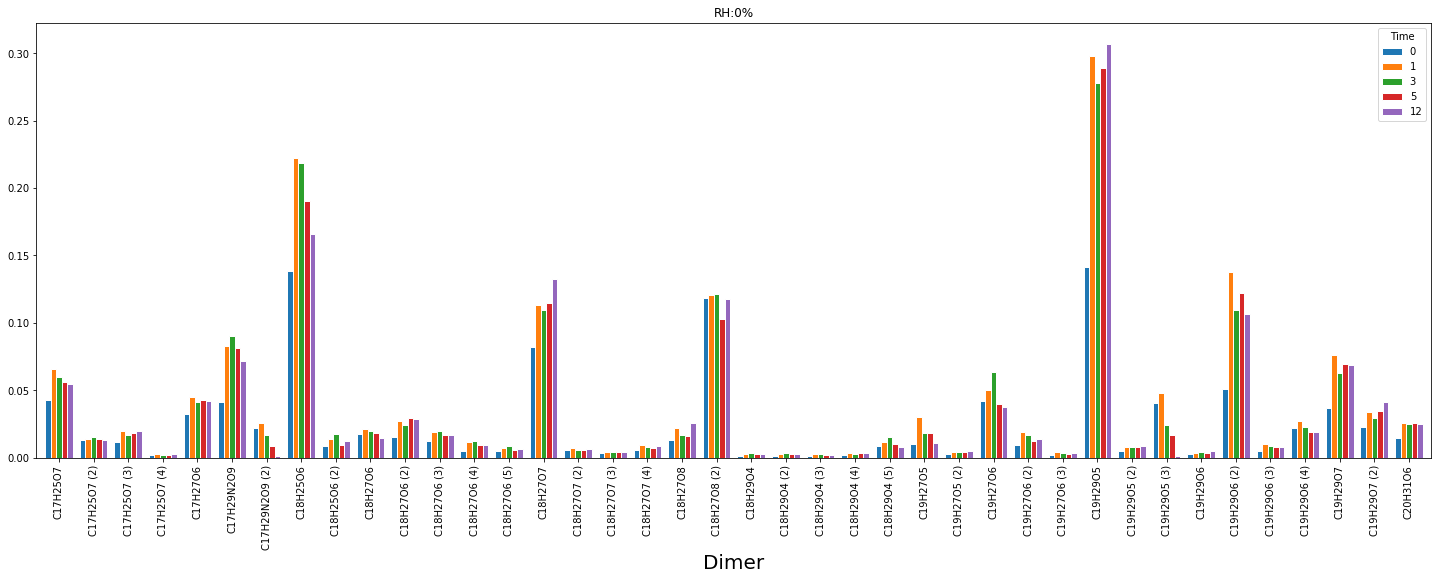

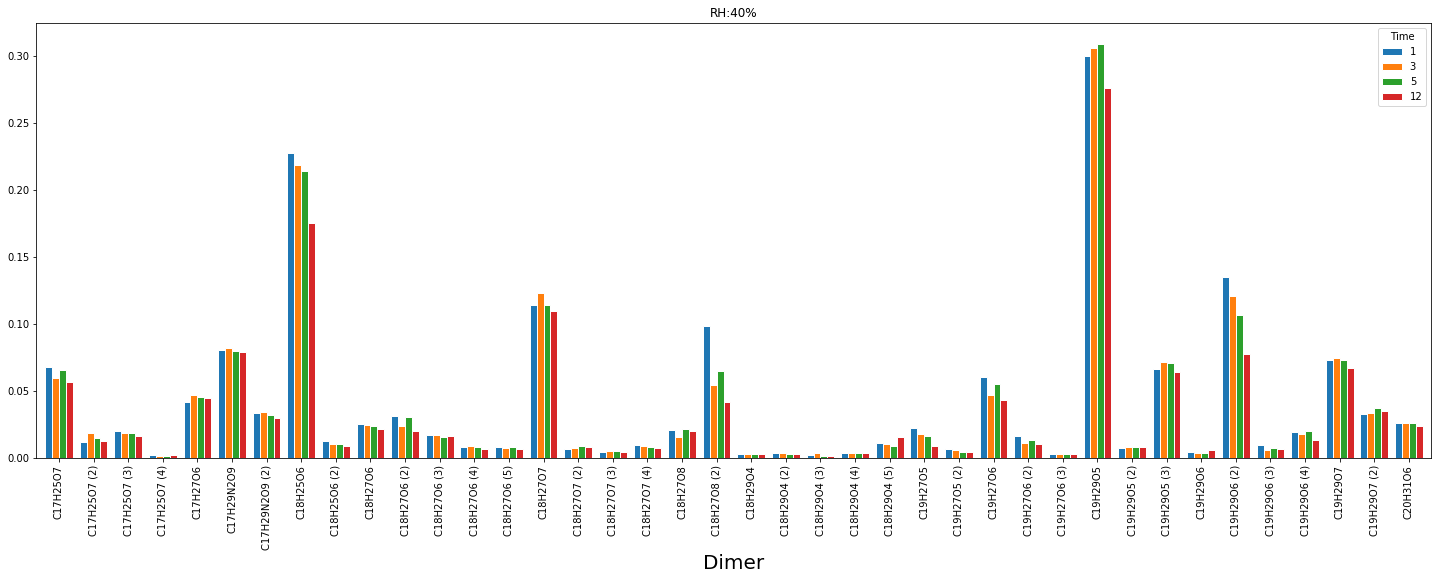

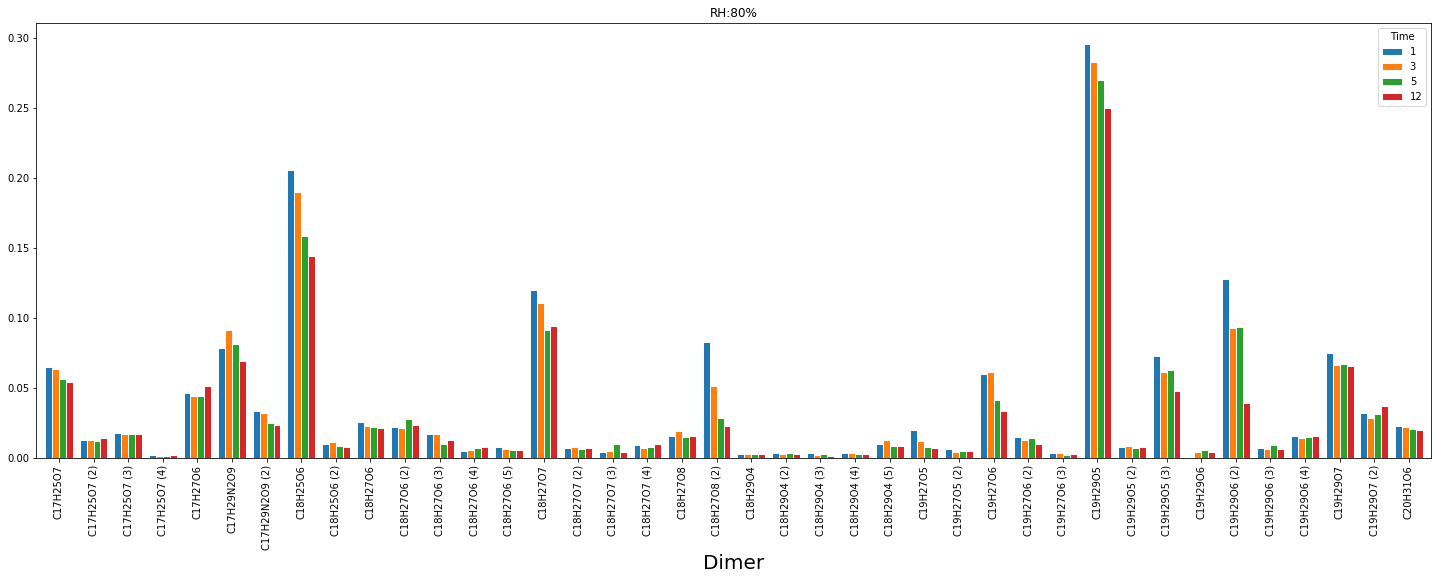

In [30]:
RH=[0,40,80]
for rh in RH:
    #二聚体数据
#     data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
    data2=data[(data['RH']==rh)]
    data2=data2[data2['type']=='Dimer']
    data2.groupby(by=['Name','Time'])['归一化信号'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 8))
    plt.xlabel('Dimer',fontsize=20)
    title='RH:%s'%rh+'%'
    plt.title(title)
    # plt.xticks(fontsize=15)
    # add_datas=data[(data['RH']==0)&(data['Time']==0)]
    # y=add_datas['Nol_Response']
    # x=add_datas['Name']
    # plt.bar(x,y,alpha=0.9, width = 0.35, facecolor = 'red', edgecolor = 'white', label='0', lw=1)
    plt.show()

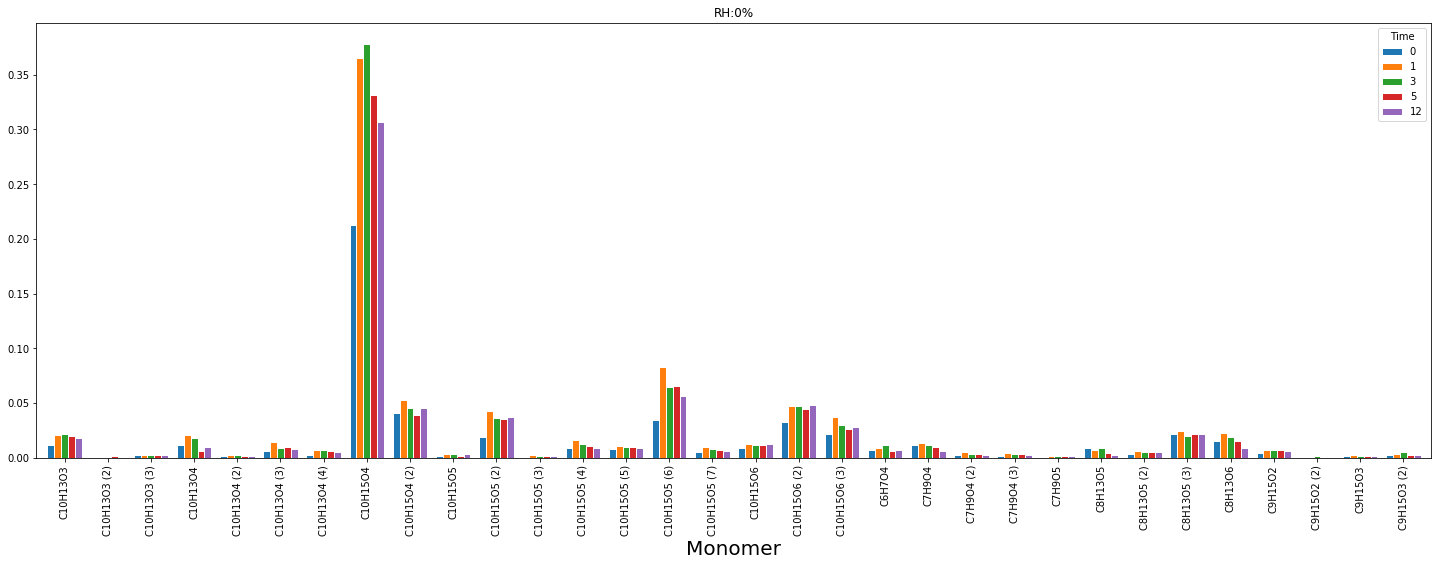

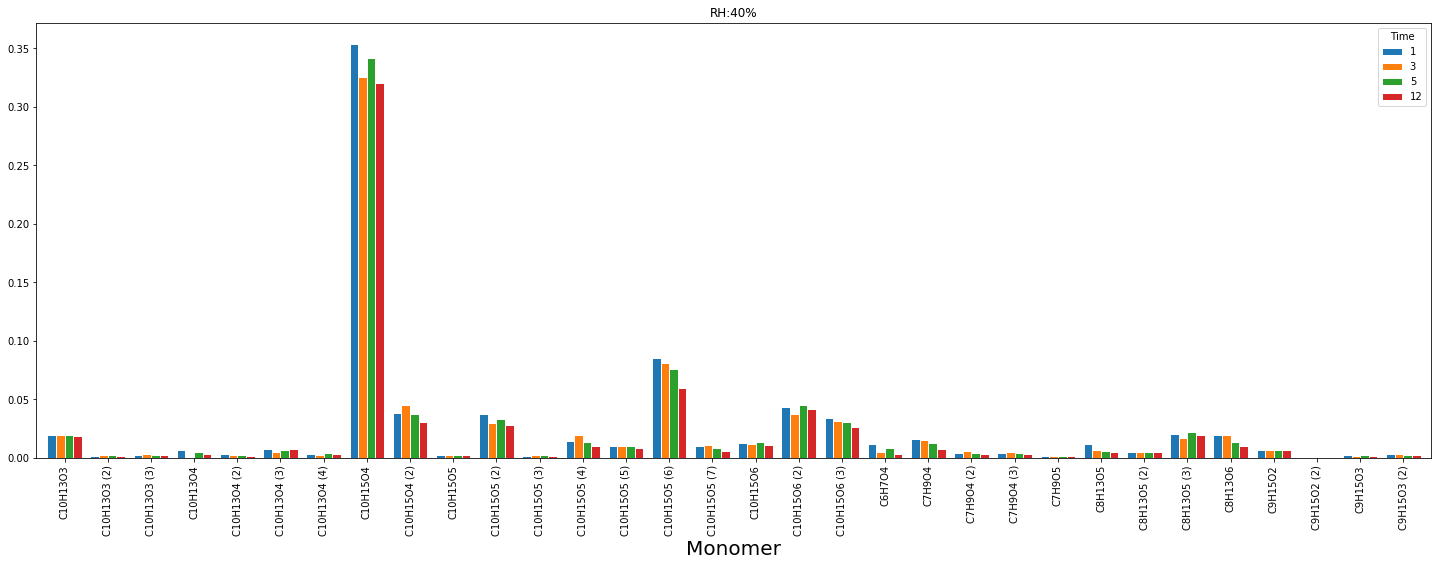

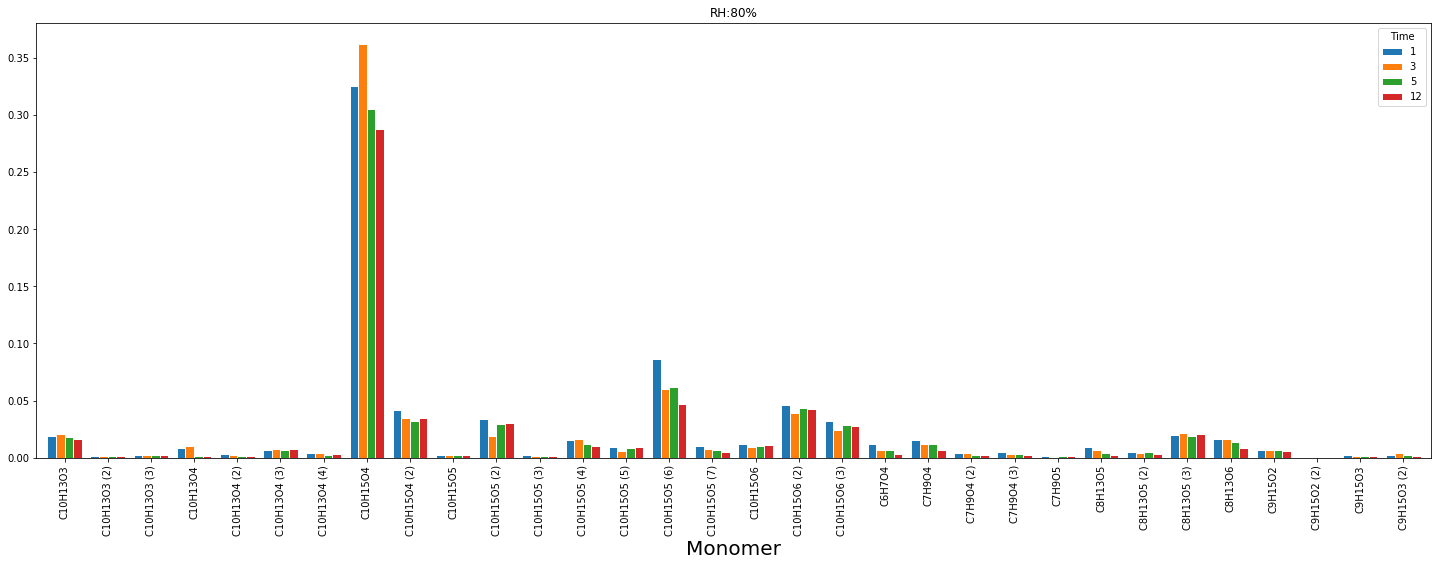

In [31]:
RH=[0,40,80]
for rh in RH:
    #二聚体数据
#     data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
    data2=data[(data['RH']==rh)]
    data2=data2[data2['type']=='Monomer']
    data2.groupby(by=['Name','Time'])['归一化信号'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 8))
    plt.xlabel('Monomer',fontsize=20)
    title='RH:%s'%rh+'%'
    plt.title(title)
    # plt.xticks(fontsize=15)
    # add_datas=data[(data['RH']==0)&(data['Time']==0)]
    # y=add_datas['Nol_Response']
    # x=add_datas['Name']
    # plt.bar(x,y,alpha=0.9, width = 0.35, facecolor = 'red', edgecolor = 'white', label='0', lw=1)
    plt.show()

In [18]:
data=neg_data[neg_data['相对比例']<=10]

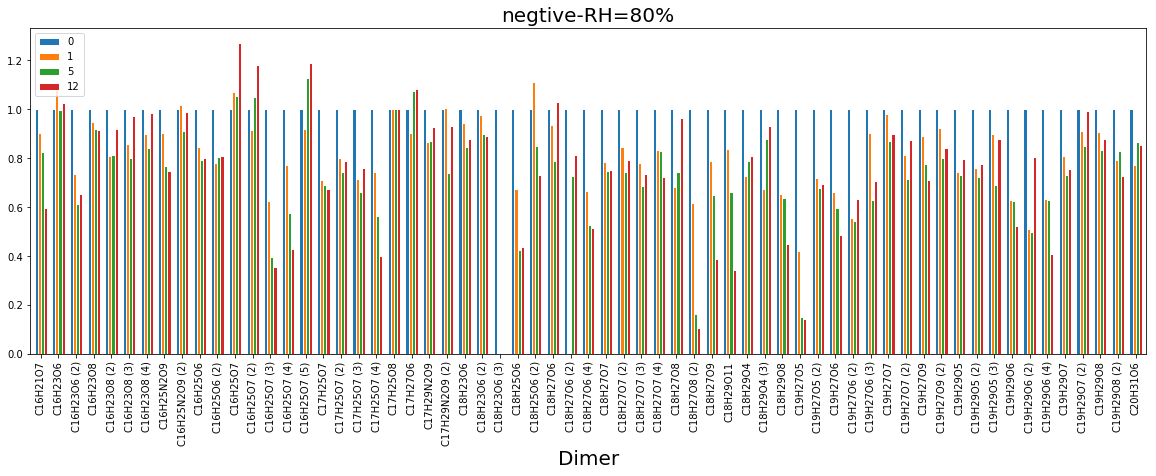

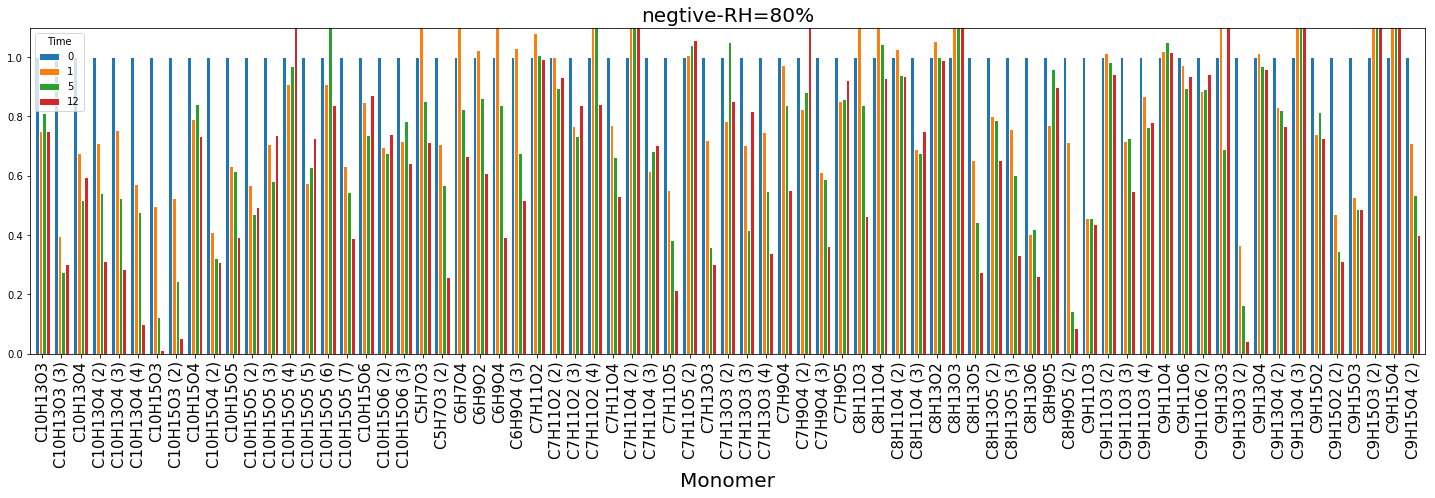

In [31]:
#二聚体数据
rh=80
# data2=data[data['RH']==rh]
data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
data2=data2[data2['type']=='Dimer']
#浓度上升
# up_data=data2[data2['变化比例']>=0]
# #浓度下降
# down_data=data2[data2['变化比例']<=0]
# data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
# data2=data[data['相对比例']<=2]

data2.groupby(by=['Name','Time'])['相对比例'].sum().unstack().plot(kind='bar', width=0.7,edgecolor = 'white',lw=1,figsize=(20,6))
plt.xlabel('Dimer',fontsize=20)
plt.title('negtive-RH=%s'%rh +'%',fontsize=20)
plt.legend(loc=2)
# plt.xticks(fontsize=15)
# add_datas=data[(data['RH']==0)&(data['Time']==0)]
# y=add_datas['Nol_Response']
# x=add_datas['Name']
# plt.bar(x,y,alpha=0.9, width = 0.35, facecolor = 'red', edgecolor = 'white', label='0', lw=1)
# plt.show()
# down_data.groupby(by=['Name','Time'])['相对比例'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(20, 4))
# plt.xlabel('Dimer',fontsize=20)
# plt.title('negtive-RH=%s'%rh +'%',fontsize=20)
# plt.show()
#单体数据
data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
data2=data2[data2['type']=='Monomer']
data2.groupby(by=['Name','Time'])['相对比例'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 6))
# bax = brokenaxes(ylims=((0.1, .2), (.3, 0.4)), hspace=.1)
plt.ylim(0,1.1)
plt.xlabel('Monomer',fontsize=20)
plt.xticks(fontsize=15)
plt.title('negtive-RH=%s'%rh+'%',fontsize=20)
plt.show()

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
RH         10 non-null int64
RH_time    10 non-null object
Time       10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138], dtype=int64)

In [32]:
data=data.drop(['Sample Name','sample name'],axis=1)

In [34]:
data=data.drop(['RH_time'],axis=1)

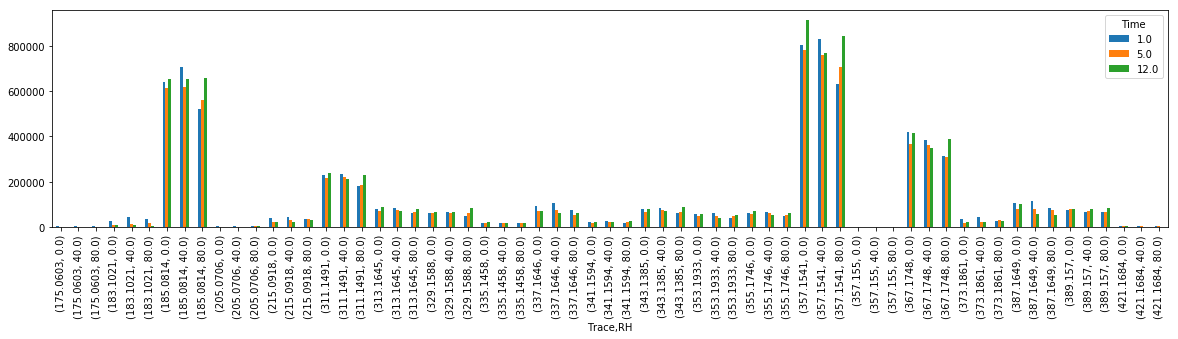

In [44]:
data.groupby(by=['Trace','RH','Time'])['Response'].sum().unstack().plot(kind='bar', figsize=(20, 4))
plt.show()

In [46]:
data.to_excel('H:\脱附实验\data_analy.xlsx',index=False)

In [50]:
data.groupby(by=['RH','Time'])['Response'].max()


RH    Time
0.0   1.0     802909.563
      5.0     780554.063
      12.0    912578.500
40.0  1.0     829437.188
      5.0     758491.688
      12.0    769415.750
80.0  1.0     631925.813
      5.0     706434.750
      12.0    841557.125
Name: Response, dtype: float64

In [24]:
data=pd.read_excel(r'H:\脱附实验\airflow_differentRh_Time_huminghao_all(1).xlsx',sheet_name=1)
data.shape

(1380, 6)

In [25]:
data.columns

Index(['id', 'Name', 'Trace', 'RT', 'Area', 'RH_Time'], dtype='object')

In [26]:
Effective_data=data.groupby(['RH_Time'])['Area'].apply(lambda x:x/np.max(x))
data['Norm signal']=Effective_data

In [63]:
type(Effective_data)

pandas.core.series.Series

In [28]:
data.head()

,id,Name,Trace,RT,Area,RH_Time,Norm signal
0,1,C10H15O3,183.1021,6.77,214.616,5,0.000275
1,2,C10H15O3 (2),183.1021,7.25,7548.293,5,0.009670
2,3,C10H15O5,215.0918,6.84,14142.921,5,0.018119
3,4,C10H15O5 (2),215.0918,5.98,6786.653,5,0.008695
4,5,C10H15O5 (3),215.0918,4.63,860.336,5,0.001102


In [29]:
data.to_excel('H:\脱附实验\differentRh_Time_huminghao_all.xlsx',index=False)

In [64]:
df=pd.read_excel(r'H:\脱附实验\differentRh_Time_huminghao_all.xlsx')

In [89]:
data.head()

,id,Name,Trace,RT,Area,Norm signal,对照实验,变化比例,type,RH,Time
0,1,C10H15O3,183.1021,6.77,214.616,0.000275,0.001288,-0.786588,Monomer,0,5
1,2,C10H15O3 (2),183.1021,7.25,7548.293,0.009670,0.110803,-0.912724,Monomer,0,5
2,3,C10H15O5,215.0918,6.84,14142.921,0.018119,0.067001,-0.729569,Monomer,0,5
3,4,C10H15O5 (2),215.0918,5.98,6786.653,0.008695,0.023000,-0.621974,Monomer,0,5
8,9,C10H15O5 (7),215.0918,7.25,1264.193,0.001620,0.006056,-0.732570,Monomer,0,5


In [87]:
data=data[data['id'].isin([ 87,115,78,134,48,32,97,2,66,4,46,1,45,135,52,63,125,9,3,41,71,114,106,126,121,119,107,33,61,26,105,59,113,112,56,116,117,136,108,98,123,39,40,25,138,47,10,57])]

In [38]:
data.groupby(by=['Name','RH','Time'])['Nol_Response'].sum.unstack().plot(kind='bar', figsize=(20, 4))
plt.show()

AttributeError: 'function' object has no attribute 'unstack'

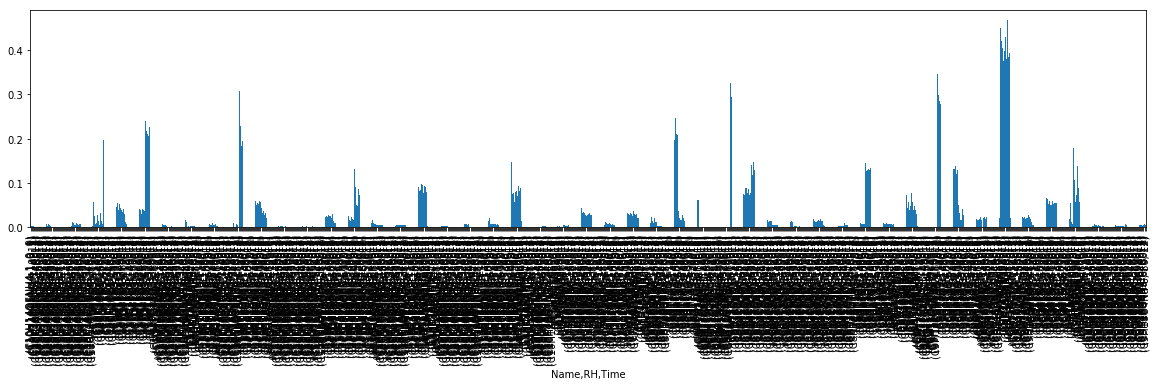

In [48]:
data1=data[data['type']=='Monomer']
data1.groupby(by=['Name','RH','Time'])['Nol_Response'].sum().plot(kind='bar', figsize=(20, 4))
plt.show()

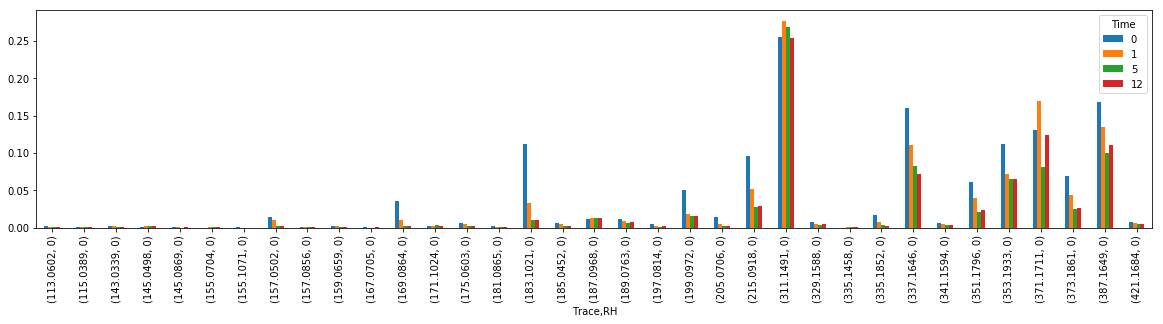

In [99]:
data1=data[(data['RH']==0&data['Trace']<=200)]
data1.groupby(by=['Trace','RH','Time'])['Norm signal'].sum().unstack().plot(kind='bar', figsize=(20, 4))
plt.show()

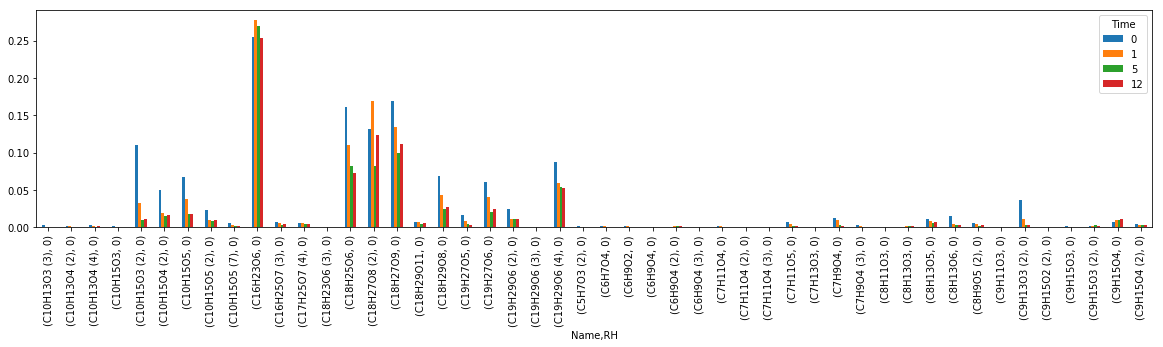

In [92]:
data1.groupby(by=['Name','RH','Time'])['Norm signal'].sum().unstack().plot(kind='bar', figsize=(20, 4))
plt.show()

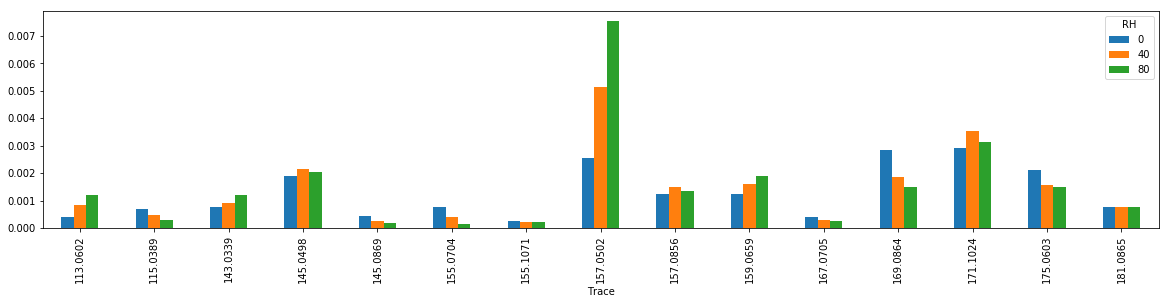

In [115]:
data2=data[data['Time']==12]
data2=data2[data2['Trace']<=182]
data2.groupby(by=['Trace','RH'])['Norm signal'].sum().unstack().plot(kind='bar', figsize=(20, 4))
plt.show()

In [40]:
df.head()

,id,Name,Trace,RT,Area,RH_Time,Norm signal,对照实验,变化比例
0,1,C10H15O3,183.1021,6.77,214.616,5,0.000275,0.001288,-0.786588
1,2,C10H15O3 (2),183.1021,7.25,7548.293,5,0.009670,0.110803,-0.912724
2,3,C10H15O5,215.0918,6.84,14142.921,5,0.018119,0.067001,-0.729569
3,4,C10H15O5 (2),215.0918,5.98,6786.653,5,0.008695,0.023000,-0.621974
4,5,C10H15O5 (3),215.0918,4.63,860.336,5,0.001102,0.001814,-0.392233


In [39]:
data.to_excel('H:\脱附实验\正离子数据处理.xlsx',index=False)

In [66]:
#判断单体与二聚体
df['type']=df.Trace.apply(lambda x: 'Dimer' if x>=250 else 'Monomer')

In [120]:
data.to_excel(r'H:\analysis_result.xlsx',index=False)

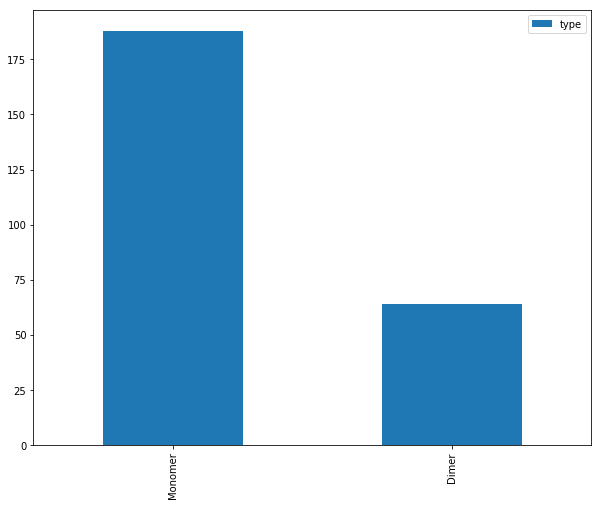

In [48]:
data['type'].value_counts().plot(kind='bar',legend=True,figsize=(10, 8))
plt.show()

In [50]:
name=df[df['id'].isin([87,115,78,134,48,32,97,2,66,4,46,1,45,135,52,63,125,9,3,41,71,114,106,126,121,119,107,33,61,26,105,59,113,112,56,116,117,136,108,98,123,39,40,25,138,47,10,57])]
b=name['Name'].unique()


['C10H15O3',
 'C10H15O3 (2)',
 'C10H15O5',
 'C10H15O5 (2)',
 'C10H15O5 (7)',
 'C16H25O7 (3)',
 'C18H23O6 (3)',
 'C18H25O6',
 'C18H29O8',
 'C19H29O6 (2)',
 'C19H29O6 (3)',
 'C8H13O6',
 'C7H11O5',
 'C10H13O4 (2)',
 'C10H13O4 (4)',
 'C19H27O5',
 'C19H27O6',
 'C9H13O3 (2)',
 'C10H13O3 (3)',
 'C10H15O4 (2)',
 'C7H11O4 (2)',
 'C7H11O4 (3)',
 'C6H9O4',
 'C6H9O4 (2)',
 'C7H9O4 (3)',
 'C8H11O3',
 'C8H9O5 (2)',
 'C9H11O3',
 'C9H15O2 (2)',
 'C9H15O3']

In [51]:
print( b)

['C10H15O3', 'C10H15O3 (2)', 'C10H15O5', 'C10H15O5 (2)', 'C10H15O5 (7)', 'C16H25O7 (3)', 'C18H23O6 (3)', 'C18H25O6', 'C18H29O8', 'C19H29O6 (2)', 'C19H29O6 (3)', 'C8H13O6', 'C7H11O5', 'C10H13O4 (2)', 'C10H13O4 (4)', 'C19H27O5', 'C19H27O6', 'C9H13O3 (2)', 'C10H13O3 (3)', 'C10H15O4 (2)', 'C7H11O4 (2)', 'C7H11O4 (3)', 'C6H9O4', 'C6H9O4 (2)', 'C7H9O4 (3)', 'C8H11O3', 'C8H9O5 (2)', 'C9H11O3', 'C9H15O2 (2)', 'C9H15O3']


In [52]:
print( b)

['C10H15O3' 'C10H15O3 (2)' 'C10H15O5' 'C10H15O5 (2)' 'C10H15O5 (7)'
 'C16H25O7 (3)' 'C18H23O6 (3)' 'C18H25O6' 'C18H29O8' 'C19H29O6 (2)'
 'C19H29O6 (3)' 'C8H13O6' 'C7H11O5' 'C10H13O4 (2)' 'C10H13O4 (4)'
 'C19H27O5' 'C19H27O6' 'C9H13O3 (2)' 'C10H13O3 (3)' 'C10H15O4 (2)'
 'C7H11O4 (2)' 'C7H11O4 (3)' 'C6H9O4' 'C6H9O4 (2)' 'C7H9O4 (3)' 'C8H11O3'
 'C8H9O5 (2)' 'C9H11O3' 'C9H15O2 (2)' 'C9H15O3']


In [49]:
data['id'].value_counts()

87     9
115    9
78     9
134    9
48     9
32     9
97     9
2      8
66     8
4      8
46     8
1      7
45     7
135    7
52     6
63     6
125    6
9      5
3      5
41     5
71     5
114    5
106    5
126    5
121    5
119    5
107    4
33     4
61     4
26     4
105    3
59     3
113    3
112    3
56     3
116    3
117    3
136    3
108    3
98     3
123    2
39     2
40     2
25     2
138    2
47     2
100    2
57     2
62     2
44     1
118    1
27     1
60     1
111    1
110    1
77     1
81     1
51     1
Name: id, dtype: int64

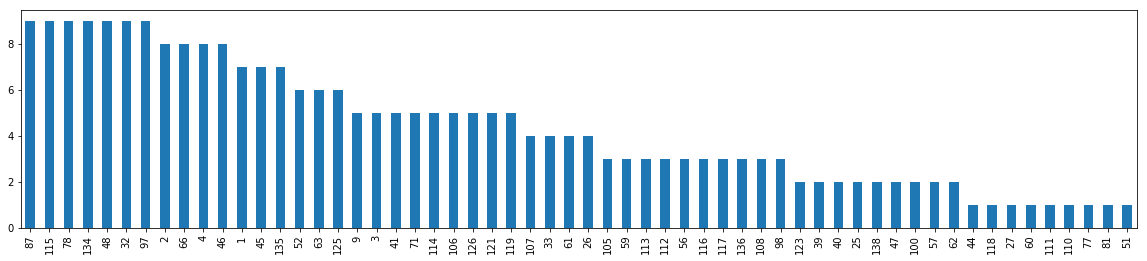

In [38]:
plt.show()

In [74]:
data.groupby(['RH', 'Time'])['id'].value_counts()

RH  Time  id
0   0     1     1
          2     1
          3     1
          4     1
          5     1
          6     1
          7     1
          8     1
          9     1
          10    1
          11    1
          12    1
          13    1
          14    1
          15    1
          16    1
          18    1
          19    1
          20    1
          21    1
          22    1
          23    1
          24    1
          25    1
          26    1
          27    1
          28    1
          29    1
          30    1
          32    1
               ..
80  5     18    1
          19    1
          21    1
          22    1
          24    1
          25    1
          27    1
          28    1
          32    1
          34    1
    12    5     1
          6     1
          7     1
          8     1
          9     1
          10    1
          11    1
          12    1
          13    1
          14    1
          15    1
          16    1
          18    1
          19   

In [20]:
df=pd.read_excel(r'H:\脱附实验\分析物质对比.xlsx')

In [6]:
text,totall=list(df['formula1']),list(df['formula2'])

In [8]:
sub=set(totall)-set(text)

In [16]:
sub

['C19H27O9',
 'C6H7O7',
 'C9H15O4',
 'C18H27O8',
 'C10H13O4',
 'C18H29O4',
 'C19H27O5',
 'C19H29O7',
 'C16H21O7',
 'C19H27O6',
 'C18H29O7',
 'C17H29N2O9',
 'C17H27O6',
 'C9H13O3',
 'C20H31O6',
 'C18H27O6',
 'C19H29O5',
 'C10H13O3',
 'C10H15O6',
 'C19H29O8',
 'C8H11O4',
 'C10H15O4',
 'C8H13O5',
 'C18H27O11']

In [17]:
data=pd.DataFrame({'sub':sub})

In [21]:
df=pd.concat([df,data],axis=1)

In [23]:
df.to_excel('H:\脱附实验\分析物质对比result.xlsx',index=False)

In [122]:
df=pd.read_excel(r'H:\脱附实验\analysis_result.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
id             480 non-null int64
Name           480 non-null object
Trace          480 non-null float64
RT             477 non-null float64
Area           477 non-null float64
Norm signal    477 non-null float64
对照实验           460 non-null float64
变化比例           478 non-null float64
type           480 non-null object
RH             480 non-null int64
Time           480 non-null int64
dtypes: float64(6), int64(3), object(2)
memory usage: 41.3+ KB


# 正离子数据

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df1=pd.read_excel(r'H:\脱附实验\正离子数据.xlsx',sheet_name='2')
# df2=pd.read_excel(r'H:\脱附实验\正离子数据.xlsx',sheet_name=2)
df1.shape

(4060, 9)

In [56]:
contains_list=['C17H30O6Na-2','C17H30O6Na-3','C18H28O6Na-6','C18H28O6Na-7','C7H12O5Na-1','C7H12O5Na-2','C7H12O5Na-3','C19H32O8Na-3']
str_list='|'.join(contains_list)
#取出原数据中没检测出，但随后检测中检测出的物质
df=df[df['Name'].str.contains(str_list, regex=True)==True]
df.head()


,id,Name,Trace,RT,Area,Response,RH_Time,C17H26O8Na-2,Nol_Response,type
200,201,C7H12O5Na-1,199.0582,6.41,1008.471,1008.471,0,293282.594,0.003439,Monomer
201,202,C7H12O5Na-2,199.0582,8.31,7489.683,7489.683,0,293282.594,0.025537,Monomer
202,203,C7H12O5Na-3,199.0582,3.48,2867.546,2867.546,0,293282.594,0.009777,Monomer
606,201,C7H12O5Na-1,199.0582,6.43,1082.300,1082.300,5,362891.250,0.002982,Monomer
607,202,C7H12O5Na-2,199.0582,8.32,9084.235,9084.235,5,362891.250,0.025033,Monomer


In [33]:
df=df.dropna()

In [34]:
df['type']=df.Trace.apply(lambda x: 'Dimer' if x>=269 else 'Monomer')
df2=pd.DataFrame({'RH_Time':[5,1,12,401,405,4012,801,805,8012,0],'RH':[0,0,0,40,40,40,80,80,80,0],'Time':[5,1,12,1,5,12,1,5,12,0]})
data = pd.merge(df,df2,how='left',on = 'RH_Time')

In [197]:
Effective_data=data.groupby(['RH_Time'])['Area'].apply(lambda x:x/np.max(x))
data['Norm signal']=Effective_data
data.head()

,id,Name,Trace,RT,Area,Response,RH_Time,type,RH,Time,Norm signal
0,1,C10H16O3Na-1,207.1000,7.23,124915.656,124915.656,0,Monomer,0,0,0.129733
1,2,C10H16O3Na-2,207.0997,9.55,2403.975,2403.975,0,Monomer,0,0,0.002497
2,3,C10H16O4Na-1,223.0946,5.62,90864.875,90864.875,0,Monomer,0,0,0.094369
3,4,C10H16O4Na-2,223.0946,5.85,22263.777,22263.777,0,Monomer,0,0,0.023122
4,5,C10H16O4Na-3,223.0946,8.13,16465.617,16465.617,0,Monomer,0,0,0.017101


In [35]:
data.head()

,id,Name,Trace,RT,Area,Response,RH_Time,C17H26O8Na-2,Nol_Response,type,RH,Time
0,1,C10H16O3Na-1,207.0997,7.23,124915.656,124915.656,0,293282.594,0.425923,Monomer,0,0
1,2,C10H16O3Na-2,207.0997,9.55,2403.975,2403.975,0,293282.594,0.008197,Monomer,0,0
2,3,C10H16O4Na-1,223.0946,5.62,90454.133,90454.133,0,293282.594,0.308420,Monomer,0,0
3,4,C10H16O4Na-2,223.0946,5.85,22263.777,22263.777,0,293282.594,0.075912,Monomer,0,0
4,5,C10H16O4Na-3,223.0946,8.13,16465.617,16465.617,0,293282.594,0.056142,Monomer,0,0


In [205]:
duizao=data[data['RH_Time']==0]['Norm signal']
duizao_data=list(duizao)*10
data['对照实验']=duizao_data
data['变化比例']=(data['Norm signal']-data['对照实验'])/data['对照实验']
data.head()

,id,Name,Trace,RT,Area,Response,RH_Time,type,RH,Time,Norm signal,对照实验,变化比例
0,1,C10H16O3Na-1,207.1000,7.23,124915.656,124915.656,0,Monomer,0,0,0.129733,0.129733,0.0
1,2,C10H16O3Na-2,207.0997,9.55,2403.975,2403.975,0,Monomer,0,0,0.002497,0.002497,0.0
2,3,C10H16O4Na-1,223.0946,5.62,90864.875,90864.875,0,Monomer,0,0,0.094369,0.094369,0.0
3,4,C10H16O4Na-2,223.0946,5.85,22263.777,22263.777,0,Monomer,0,0,0.023122,0.023122,0.0
4,5,C10H16O4Na-3,223.0946,8.13,16465.617,16465.617,0,Monomer,0,0,0.017101,0.017101,0.0


In [ ]:
duizao=data[data['RH_Time']==0]['Norm signal']
duizao_data=list(duizao)*10
data['对照实验']=duizao_data
data['变化比例']=(data['Norm signal']-data['对照实验'])/data['对照实验']
data.head()

In [269]:
data=pd.read_excel(r'H:\脱附实验\differentRh_Time_huminghao_all.xlsx')
data.head()

,id,Name,Trace,RT,Area,RH_Time,Norm signal,对照实验,变化比例
0,1,C10H15O3,183.1021,6.77,214.616,5,0.000275,0.001288,-0.786588
1,2,C10H15O3 (2),183.1021,7.25,7548.293,5,0.009670,0.110803,-0.912724
2,3,C10H15O5,215.0918,6.84,14142.921,5,0.018119,0.067001,-0.729569
3,4,C10H15O5 (2),215.0918,5.98,6786.653,5,0.008695,0.023000,-0.621974
4,5,C10H15O5 (3),215.0918,4.63,860.336,5,0.001102,0.001814,-0.392233


In [271]:
data['type']=data.Trace.apply(lambda x: 'Dimer' if x>=250 else 'Monomer')
df2=pd.DataFrame({'RH_Time':[5,1,12,401,405,4012,801,805,8012,0],'RH':[0,0,0,40,40,40,80,80,80,0],'Time':[5,1,12,1,5,12,1,5,12,0]})
data = pd.merge(data,df2,how='left',on = 'RH_Time')

In [273]:
data.to_excel('H:\脱附实验\Rh_Time_huminghao_result.xlsx')

C:\Users\hao\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


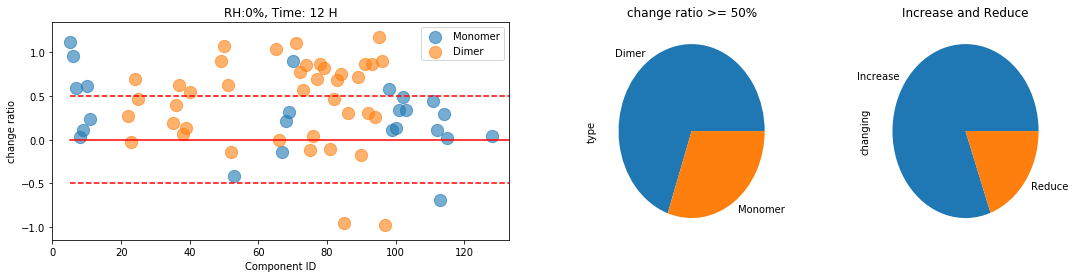

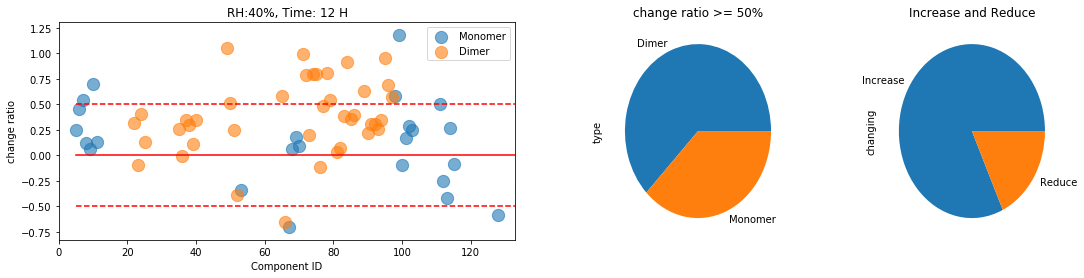

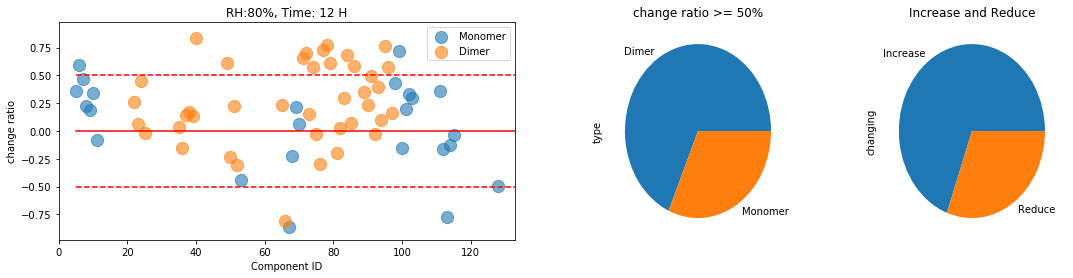

In [32]:
rh=[0,40,80]
for RH in rh:
    a='RH:%s'%RH+'%,'+' Time: 12 H'
    grouped=data[(data['变化比例']<=2)&(data['Time']==12)&(data['RH']==RH)]
    x1=grouped[grouped['type']=='Monomer']['id']
    y1=grouped[grouped['type']=='Monomer']['变化比例']
    x2=grouped[grouped['type']=='Dimer']['id']
    y2=grouped[grouped['type']=='Dimer']['变化比例']
    plt.figure(figsize=(18, 4))
    grid = plt.GridSpec(1, 4, wspace=0.5, hspace=0.5)
    fig=plt.subplot(grid[0,0:2])
    plt.scatter(x=x1,y=y1,s=150,alpha=0.6)
    plt.scatter(x=x2,y=y2,s=150,alpha=0.6)
    plt.xlabel('Component ID')
    plt.ylabel('change ratio')
    plt.legend(['Monomer','Dimer'])
    plt.xlim(0,133)
    x=grouped['id']
    y1=np.zeros((len(x),1))
    y2=np.ones((len(x),1))*-0.5
    y3=np.ones((len(x),1))*0.5
    plt.plot(x,y1,'r-',x,y2,'r--',x,y3,'r--')
    plt.title(a)
    fig=plt.subplot(grid[0,2:3])
    check_data=grouped[abs(grouped['变化比例'])>=0.5]
    check_data['type'].value_counts().plot(kind='pie')
    plt.title('change ratio >= 50%')
    fig=plt.subplot(grid[0,3:4])
    grouped['changing']=grouped['变化比例'].apply(lambda x: 'Increase' if x>=0 else 'Reduce')
    grouped['changing'].value_counts().plot(kind='pie')
    plt.title('Increase and Reduce')
    plt.show()

In [265]:
grouped=data[(data['变化比例']<=2)&(data['Time']==1)&(data['RH']==0)]
x1=data['id']
y1=data['变化比例']

In [268]:
data['id']

8       32
14      46
36     115
40     121
41     123
56      32
62      46
84     115
104     32
110     46
126    106
132    115
136    121
152     32
158     46
177    112
180    115
200     32
206     46
222    106
228    115
232    121
248     32
254     46
258     56
270    106
276    115
286    136
296     32
306     56
324    115
328    121
329    123
334    136
344     32
350     46
354     56
366    106
372    115
382    136
392     32
398     46
414    106
420    115
Name: id, dtype: int64

In [251]:
data=data.iloc[:,[0,7,8,9,10]]

C:\Users\hao\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=62.0, right=62.0
  'left=%s, right=%s') % (left, right))


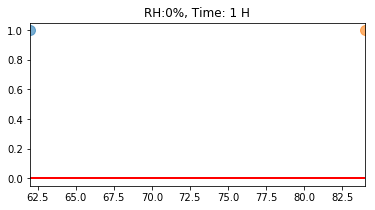

C:\Users\hao\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=158.0, right=158.0
  'left=%s, right=%s') % (left, right))


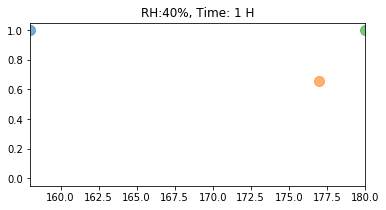

C:\Users\hao\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=306.0, right=306.0
  'left=%s, right=%s') % (left, right))


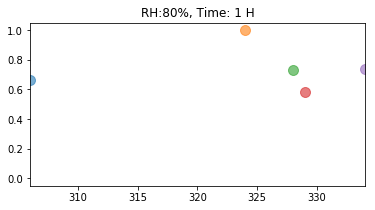

In [259]:
grouped=data[(data['变化比例']<=2)&(data['Time']==1)].groupby(by='RH')
rh=[0,40,80]
for RH in rh:
    a='RH:%s'%RH+'%,'+' Time: 1 H'
    grouped.get_group(RH).groupby(by=['id','type'])['变化比例'].plot(x='id',y='变化比例',kind='line', marker='o',linestyle='',ms=10,alpha=0.6,figsize=(6, 3))
#     plt.ylim(-0.9,0.9)
    x=data['id']
    y=np.zeros((len(x),1))
    plt.plot(x,y,'r-.')
    plt.title(a)
    plt.show()

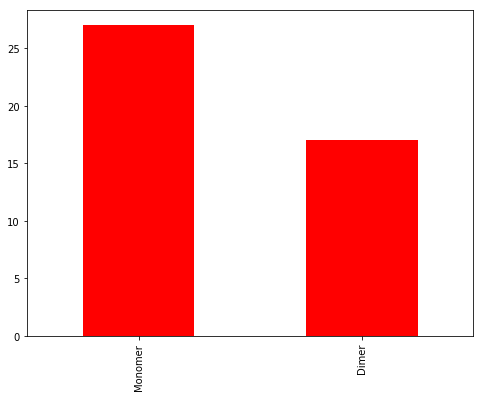

In [257]:
data=data[data['变化比例']>=0.5]
data['type'].value_counts().plot(kind='bar',figsize=(8,6),color='red')
plt.show()

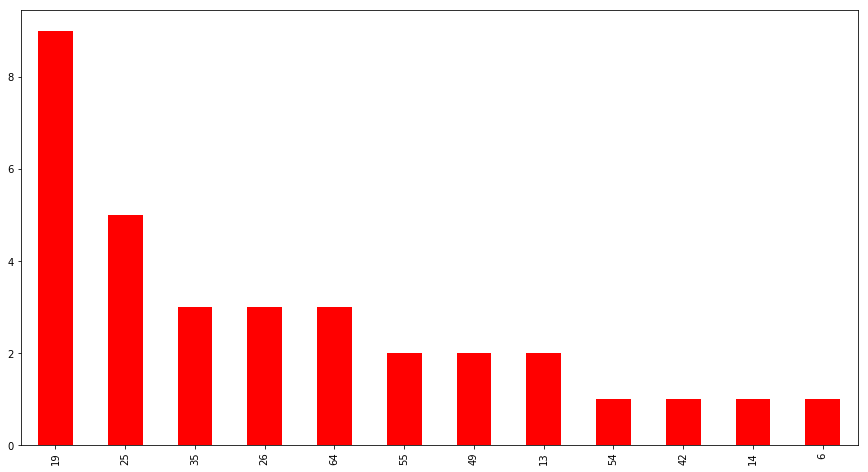

In [224]:
data['id'].value_counts().plot(kind='bar',figsize=(15,8),color='red')
plt.show()

In [226]:
data['Name'].unique()

array(['C15H24O4Na-2', 'C15H26O5Na-3', 'C16H24O7Na-3', 'C8H18O5Na-1',
       'C10H18O5Na-2', 'C7H10O3Na', 'C8H10O4Na-1', 'C8H10O4Na-2',
       'C15H26O6Na-1', 'C10H18O5Na-1', 'C10H16O5Na-1', 'C16H26O7Na-1'], dtype=object)

In [ ]:
data2=data[data['Time']==12]
data2=data2[data2['Trace']<=182]
data2.groupby(by=['Trace','RH'])['Norm signal'].sum().unstack().plot(kind='bar', figsize=(20, 4))
plt.show()

In [147]:
x=data['Trace'].unique()
len(x)

62

In [176]:
RH=40
'RH:%s'%RH+'%'

'RH:40%'

In [160]:
data[data['变化比例']<=2].groupby(by=['Trace','type','RH','Time'])['变化比例'].mean()

Trace     type     RH  Time
113.0602  Monomer  0   0       0.000000
                       1      -0.158658
                       5      -0.721146
                       12     -0.790076
                   40  1      -0.090342
                       5      -0.329206
                       12     -0.565140
                   80  1       0.024469
                       5      -0.137459
                       12     -0.389362
115.0389  Monomer  0   0       0.000000
                       1      -0.202992
                       5      -0.403000
                       12     -0.368940
                   40  1      -0.199494
                       5      -0.445959
                       12     -0.535184
                   80  1      -0.088949
                       5      -0.290425
                       12     -0.514027
127.0758  Monomer  0   0       0.000000
                       1      -0.017868
                       5      -0.190064
                       12     -0.193824
            

In [231]:
df=pd.read_excel(r'H:\脱附实验\分析物质.xlsx')
data1=df['已分析物质']
data2=df['总物质']
data3=set(data2)-set(data1)
df1=pd.DataFrame({'未分析物质':data3})
df=pd.concat([df,df1],axis=1)
df.head()

,已分析物质,总物质,未分析物质
0,C10H15O3,C10H13O3,"{C8H9O7, C20H29O8, C18H27O4, C8H13O4, C8H11O6,..."
1,C10H15O5,C10H13O4,"{C8H9O7, C20H29O8, C18H27O4, C8H13O4, C8H11O6,..."
2,C16H23O6,C10H13O5,"{C8H9O7, C20H29O8, C18H27O4, C8H13O4, C8H11O6,..."
3,C16H23O8,C10H13O6,"{C8H9O7, C20H29O8, C18H27O4, C8H13O4, C8H11O6,..."
4,C16H25N2O9,C10H15O3,"{C8H9O7, C20H29O8, C18H27O4, C8H13O4, C8H11O6,..."


In [234]:
df=df.drop('未分析物质',axis=1)

In [235]:
data1=df['已分析物质']
data2=df['总物质']
data3=set(data2)-set(data1)
data3=list(data3)
df1=pd.DataFrame({'未分析物质':data3})
df=pd.concat([df,df1],axis=1)
df.head()

,已分析物质,总物质,未分析物质
0,C10H15O3,C10H13O3,C8H9O7
1,C10H15O5,C10H13O4,C20H29O8
2,C16H23O6,C10H13O5,C18H27O4
3,C16H23O8,C10H13O6,C8H13O4
4,C16H25N2O9,C10H15O3,C8H11O6


In [236]:
df.to_excel(r'H:\脱附实验\分析物质_result.xlsx',index=False)

# 正离子模式处理

In [1]:
import pandas as pd
import numpy as np

In [7]:
df1=pd.read_excel(r'H:\脱附实验\正离子模式处理.xlsx',sheetname='脱附实验(agine)正离子')
df1=df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4079 entries, 0 to 4139
Data columns (total 7 columns):
id          4079 non-null int64
Name        4079 non-null object
Trace       4079 non-null float64
RT          4079 non-null float64
Area        4079 non-null float64
Response    4079 non-null float64
RH_Time     4079 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 254.9+ KB


In [8]:
df1.head()

,id,Name,Trace,RT,Area,Response,RH_Time
0,1,C10H16O3Na-1,207.0997,7.23,124915.656,124915.656,0
1,2,C10H16O3Na-2,207.0997,9.55,2403.975,2403.975,0
2,3,C10H16O4Na-1,223.0946,5.62,90454.133,90454.133,0
3,4,C10H16O4Na-2,223.0946,5.85,22263.777,22263.777,0
4,5,C10H16O4Na-3,223.0946,8.13,16465.617,16465.617,0


In [30]:
No_Compoent=df1[df1['Name']=='C17H26O8Na-2'].groupby('RH_Time')
No_Compoent.head()

,id,Name,Trace,RT,Area,Response,RH_Time
61,62,C17H26O8Na-2,381.153,8.32,293282.594,293282.594,0
467,62,C17H26O8Na-2,381.153,8.32,362891.250,362891.250,5
873,62,C17H26O8Na-2,381.153,8.32,341790.063,341790.063,1
1279,62,C17H26O8Na-2,381.153,8.32,389103.906,389103.906,12
1685,62,C17H26O8Na-2,381.153,8.32,365936.313,365936.313,401
2091,62,C17H26O8Na-2,381.153,8.32,336960.219,336960.219,405
2497,62,C17H26O8Na-2,381.153,8.32,383617.844,383617.844,4012
2903,62,C17H26O8Na-2,381.153,8.32,267688.406,267688.406,801
3309,62,C17H26O8Na-2,381.153,8.32,344618.531,344618.531,805
3715,62,C17H26O8Na-2,381.153,8.31,378525.250,378525.250,8012


In [28]:
df1[df1['Name']=='C17H26O8Na-2'].groupby('RH_Time')
# data=df1.groupby('RH_Time')
# data['Nol_Response']=data['Response']/Nol_Com['Response']
# data.head()


In [31]:
df2=pd.read_excel(r'H:\脱附实验\正离子模式处理.xlsx',sheet_name='正离子归一化数据（C17H26O8Na-2）')
df2.head()

,正离子清单处理,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,1-46,NaN,NaN,NaN,NaN,NaN
1,2019-09-28 00:00:00,47-116,NaN,C19H30O6Na-2,NaN,NaN,NaN
2,2019-09-29 00:00:00,上午,117-341,NaN,119.0,C19H30O7Na-1,以后只改出峰时间与多或少的峰
3,NaN,下午,341-344,NaN,NaN,后面均为补充物质，删除,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
